Dec 2016
<img width=300 src="./fig/ladisk.png">

<center>[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# Diskretna Fourierjeva integralska transformacija

Teorija (Fourierjeva transformacija - Fourierjev integral):

$
x(t)=\int_{-\infty}^{\infty}
X(f)\,e^{j\,2\,\pi\,f\,t}\,df
$


$
X(f)=\int_{-\infty}^{\infty}
x(t)\,e^{-j\,2\,\pi\,f\,t}\,dt
$ (Amplitudna gostota $X(f)=\lim_{\Delta f\rightarrow 0}\frac{c_n}{\Delta f}$)

In [2]:
def Xf(x, t, f, predznak=-1):
    dt = t[1] - t[0]
    return np.trapz(x*np.exp(predznak*1j*2*np.pi*f*t),dx=dt)

def X(x, t, f):
    return np.asarray([Xf(x, t, _f) for _f in f])

def xr(X, t, f):
    return np.asarray([Xf(X, f, _t, 1) for _t in t])#pazi minus pri f

Harmonska funkcija

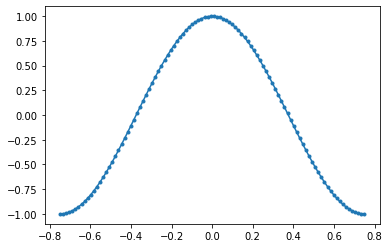

In [3]:
T = 1.5
N = 100
f = 1/1.5
t1 = np.linspace(-T/2, T/2, N)# ! pazi tukaj: integriranje do konca T
dt = t1[1] - t1[0]
x1 = np.cos(2*np.pi*f*t1+0.*np.pi)
#x=x+0.05*(np.random.rand(N)-0.5)
plt.plot(t1, x1,'.-');

Čas

In [4]:
[t1[0], t1[-1], dt, len(t1)]

[-0.75, 0.75, 0.015151515151515138, 100]

Vrednosti

In [5]:
[x1[0], x1[-1]]

[-1.0, -1.0]

DFT

In [6]:
df = 1/T
fmax = df*(N)/2
f1 = np.linspace(-fmax, fmax, N+1)
X1 = X(x1,t1,f1)

(-3.0, 3.0)

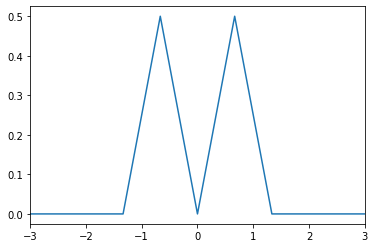

In [7]:
plt.plot(f1,np.abs(X1)/T);
plt.xlim(-3,3)

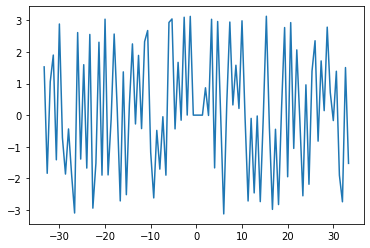

In [8]:
plt.plot(f1, np.angle(X1));

In [9]:
sel = np.abs((f1-f))<1e-6

In [10]:
2/T*np.abs(X1[sel])

array([1.])

In [11]:
np.angle(X1[sel])

array([-2.28405258e-17])

# Hitra FFT

Definicija v vašem programu

$X_k=\sum_{m=0}^{n-1}\,x_m\,e^{-j\,2\,\pi\,m\,k/n}$    kjer je: $k=0,1,2,\dots,n-1$

$x_m=\frac{1}{n}\,\sum_{k=0}^{n-1}\,X_k\,e^{j\,2\,\pi\,m\,k/n}$    kjer je: $m=0,1,2,\dots,n-1$

Opomba: 

1. $k$ gre do $n-1$ ! Sledi: $T= n\,dt$

2. čas gre od 0s pri $k=0$!!

In [12]:
#?np.fft

In [13]:
t2 = t1[:-1]
x2 = x1[:-1]

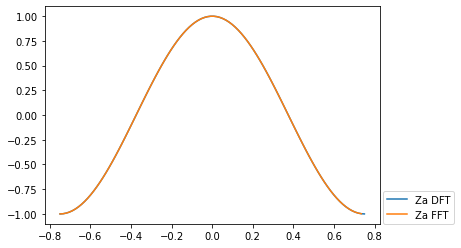

In [14]:
plt.plot(t1,x1, label='Za DFT')
plt.plot(t2,x2, label='Za FFT')
plt.legend(loc=(1.01, 0));

Čas

In [15]:
[t2[0], t2[-1], dt, len(t2)]

[-0.75, 0.7348484848484849, 0.015151515151515138, 99]

Vrednosti

In [16]:
[x2[0], x2[-1]]

[-1.0, -0.9979866764718843]

In [17]:
X2 = np.fft.fft(x2)
f2 = np.fft.fftfreq(len(x2), dt)

In [18]:
f2

array([  0.        ,   0.66666667,   1.33333333,   2.        ,
         2.66666667,   3.33333333,   4.        ,   4.66666667,
         5.33333333,   6.        ,   6.66666667,   7.33333333,
         8.        ,   8.66666667,   9.33333333,  10.        ,
        10.66666667,  11.33333333,  12.        ,  12.66666667,
        13.33333333,  14.        ,  14.66666667,  15.33333333,
        16.        ,  16.66666667,  17.33333333,  18.        ,
        18.66666667,  19.33333333,  20.        ,  20.66666667,
        21.33333333,  22.        ,  22.66666667,  23.33333333,
        24.        ,  24.66666667,  25.33333333,  26.        ,
        26.66666667,  27.33333333,  28.        ,  28.66666667,
        29.33333333,  30.        ,  30.66666667,  31.33333333,
        32.        ,  32.66666667, -32.66666667, -32.        ,
       -31.33333333, -30.66666667, -30.        , -29.33333333,
       -28.66666667, -28.        , -27.33333333, -26.66666667,
       -26.        , -25.33333333, -24.66666667, -24.  

Amlitudni spekter

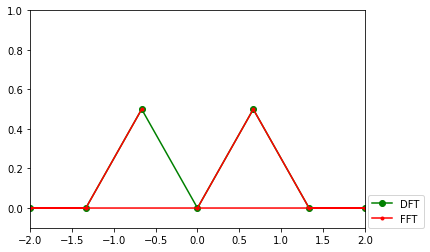

In [19]:
plt.plot(f1, np.abs(X1/T), 'go-', label='DFT')
plt.plot(f2, np.abs(X2/len(X2)), 'r.-', label='FFT')
plt.xlim(-2, 2)
plt.ylim(-.1, 1)
plt.legend(loc=(1.01, 0.));

Poglejmo kako imamo definirani seznam frekvenc

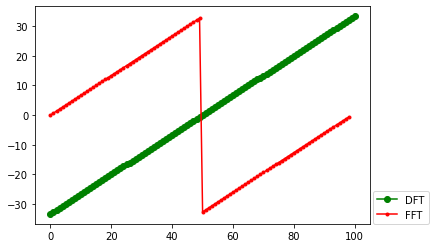

In [20]:
plt.plot(f1,'go-', label='DFT');
plt.plot(f2,'r.-', label='FFT');
plt.legend(loc=(1.01, 0.));

Fazni spekter

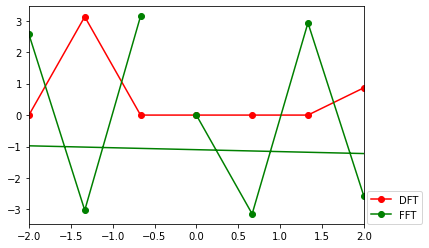

In [21]:
plt.plot(f1, np.angle(X1),'ro-', label='DFT')
plt.plot(f2, np.angle(X2), 'go-', label='FFT')
plt.xlim(-2, 2)
plt.legend(loc=(1.01, 0.));

Zakaj se fazi ne ujemata? (Odgovor na koncu dokumenta)

In [22]:
np.angle(X1[f1==f])

array([], dtype=float64)

In [23]:
np.angle(X2[f2==f])

array([], dtype=float64)

Primerjava hitrosti

In [24]:
%timeit X(x1,t1,f1)

5.2 ms ± 83.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit np.fft.fft(x2)

14 µs ± 307 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Konvolucijski integral

Udarna motnja na linearni sistem z eno PS

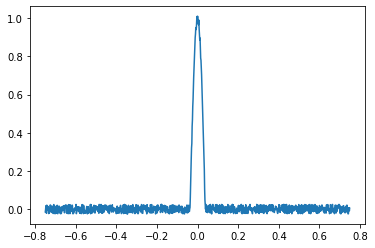

In [26]:
T = 1.5
N = 1000
w = 0.1
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(2*np.pi*t/(w*T))
x[np.logical_or(-w*T*0.25>t, t>w*T*0.25)] = 0.
x = x + 0.05*(np.random.rand(N)-0.5)
plt.plot(t,x);

Impulzna odzivna funkcija (tudi spominska funkcija) pri dušenem sistemu: $h(t)=\frac{1}{\omega_{0d}}\,e^{-\delta\,\omega_0\,t}\,\sin(\omega_{0d}\,t)$

In [27]:
delta = 0.1 #dušenje sistema
omega0 = 2*np.pi*10
omega0d = omega0*np.sqrt(1-delta*delta)
th = dt*np.arange(len(x))
h = np.exp(-delta*omega0*th)*np.sin(omega0d*th)/omega0d

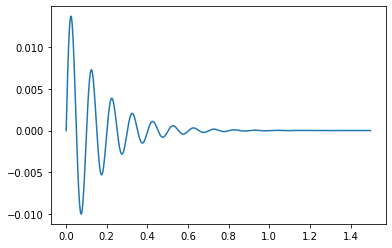

In [28]:
plt.plot(th,h);

Izračun konvoucijskega integrala $\int_{-\infty}^{\infty}h(\tau)\,x(t-\tau)\,d\tau$

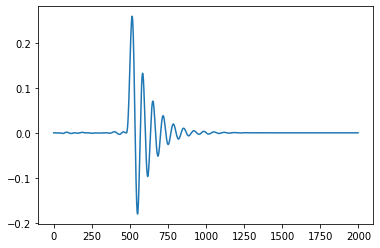

In [29]:
hx = np.convolve(h, x)#dolžina: vsota obeh dolžin
plt.plot(hx);

In [30]:
hx = hx[:len(x)]#odrežemo dolžino po času, ki nas zanima

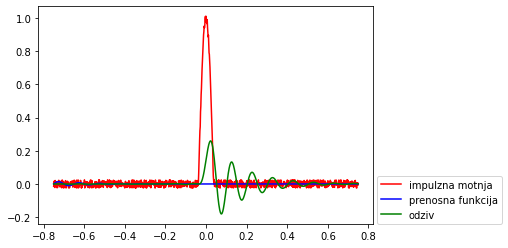

In [31]:
plt.plot(t, x, 'r', label='impulzna motnja')
plt.plot(t, h, 'b', label='prenosna funkcija')
plt.plot(t, hx, 'g', label='odziv')
plt.legend(loc=(1.01, 0));

In [32]:
HX = np.fft.fft(hx)
H = np.fft.fft(h)
X2 = np.fft.fft(x)
f = np.fft.fftfreq(len(hx),dt)

# Fourierjeva transformacija konvolucije dveh funkcij

$F\{h(t)\ast x(t)\}=H(f)\,X(f)$

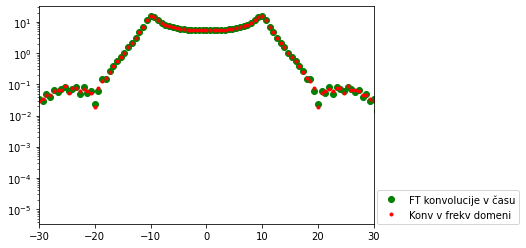

In [33]:
plt.semilogy(f, np.abs(HX) ,'go', label='FT konvolucije v času')
plt.semilogy(f, np.abs(H*X2) ,'r.', label='Konv v frekv domeni')
plt.xlim(-30,30)
plt.legend(loc=(1.01, 0));

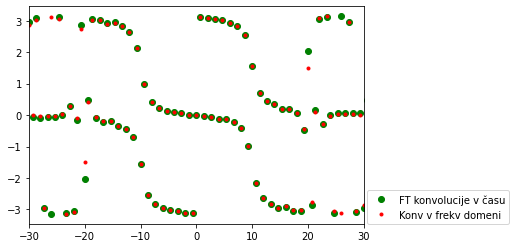

In [34]:
plt.plot(f, np.angle(HX) ,'go', label='FT konvolucije v času')
plt.plot(f, np.angle(H*X2) ,'r.', label='Konv v frekv domeni')
plt.xlim(-30,30)
plt.legend(loc=(1.01, 0));

c:\python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


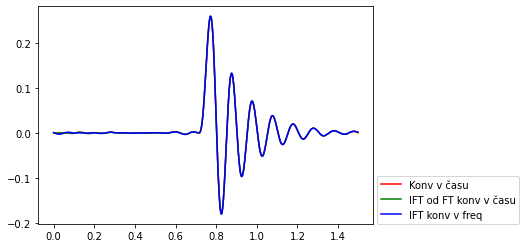

In [35]:
hx_r = np.fft.ifft(HX)
hx_r2 = np.fft.ifft(H*X2) # pazi dt
plt.plot(th, hx, 'r', label='Konv v času')
plt.plot(th, hx_r, 'g', label='IFT od FT konv v času')
plt.plot(th, hx_r2, 'b', label='IFT konv v freq')
plt.legend(loc=(1.01, 0));

# Okna in Fourierjeva transformacija produkta funkcij

Fourierjeva transformacija produkta funkcij:

$F\{x(t)\,w(t)\}=X(f)\ast W(f).$

Opomba: $\ast$ je znak za konvolucijo

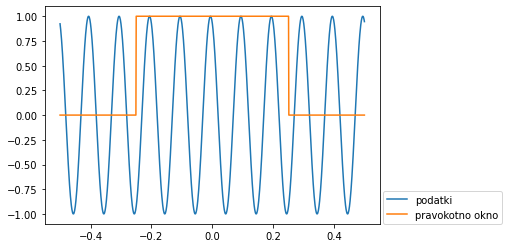

In [36]:
T = 1.
N = 1000
omega = 10.*2*np.pi
dt = T/(N)
t = dt*np.arange(N)-T/2
x = np.cos(omega*t+np.random.rand())+0.*np.random.rand(N)
#okno
w = np.ones_like(x)
w[np.abs(t) > T/4] = 0
w = w#+(np.random.rand(N)-0.5)/10000#šum dodan zaradi frek prostora
plt.plot(t,x, label='podatki')
plt.plot(t,w, label='pravokotno okno')
plt.legend(loc=(1.01, 0));

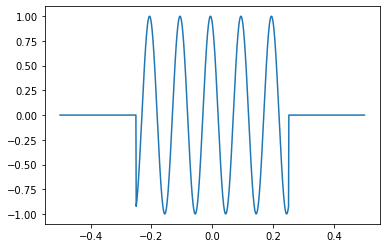

In [37]:
xw = x*w
plt.plot(t, xw);

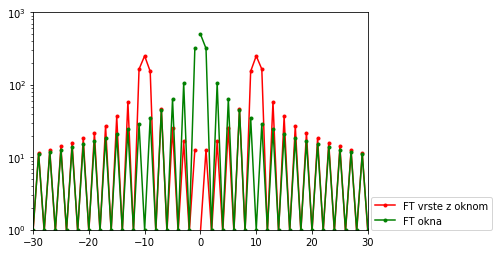

In [38]:
XW = np.fft.fft(xw)
W = np.fft.fft(w)
f = np.fft.fftfreq(len(xw),dt)
plt.semilogy(f,np.abs(XW),'r.-', label='FT vrste z oknom')
plt.semilogy(f,np.abs(W),'g.-', label='FT okna')
plt.xlim(-30,30)
plt.ylim(1e-0,1e3)
plt.legend(loc=(1.01, 0));

In [39]:
np.abs(W[:10])

array([501.        , 318.30883899,   1.        , 106.10015378,
         1.        ,  63.65674116,   1.        ,  45.46551026,
         1.        ,  35.35833985])

In [40]:
np.abs(f[:10])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Različna okna

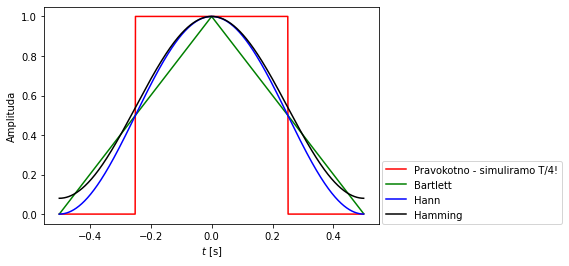

In [41]:
A = 1
T = 1.
N = 1000
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
#pravokotno
wp = np.ones_like(t)
Tp = 0.5*T/2 # teoretično bi tukaj morali vzeti 1*T/2
wp[np.abs(t)>Tp] = 0
wp = A*wp+(np.random.rand(N)-0.5)/10000#šum dodan zaradi frek prostora
Wp = np.fft.fft(wp)
f = np.fft.fftfreq(len(wp), dt)
fT_teor = np.arange(-10,10,0.01)
Wp_teor = A*T / (np.pi*fT_teor) * np.sin(np.pi*fT_teor)

#Bartlett
wBartlett = np.ones_like(t)
wBartlett = A*(wBartlett-np.abs(t)/(T/2))
WBartlett = np.fft.fft(wBartlett)
WBartlett_teor = 0.5*A*T * np.power(np.sin(0.5*np.pi*fT_teor) / (0.5*np.pi*fT_teor),2)

#Hann
wHann = A*np.power(np.cos(np.pi*t/T), 2)
WHann = np.fft.fft(wHann)
WHann_teor = 0.5*A*T * np.sin(np.pi*fT_teor) / (np.pi*fT_teor*(1-fT_teor**2))

#Hamming
wHamming = 0.54+0.46*np.cos(2*np.pi*t/T)
WHamming = np.fft.fft(wHamming)
WHamming_teor = (0.54*np.pi**2-0.08*(np.pi*fT_teor)**2)*np.sin(np.pi*fT_teor)/(np.pi*fT_teor*(np.pi**2-(np.pi*fT_teor)**2))

plt.plot(t,wp,'r', label='Pravokotno - simuliramo T/4!')
plt.plot(t,wBartlett,'g', label='Bartlett')
plt.plot(t,wHann,'b', label='Hann')
plt.plot(t,wHamming,'k', label='Hamming')
plt.xlabel('$t$ [s]')
plt.ylabel('Amplituda')
plt.legend(loc=(1.01, 0));

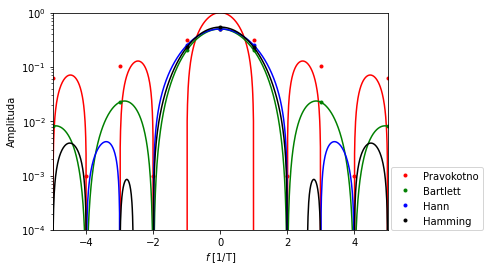

In [42]:
narisi = plt.plot
narisi = plt.semilogy
narisi(f*T, np.abs(Wp)/len(Wp), 'r.', label='Pravokotno')
narisi(fT_teor, Wp_teor, 'r-')
narisi(f*T, np.abs(WBartlett)/N, 'g.', label='Bartlett')
narisi(fT_teor, WBartlett_teor, 'g-')
narisi(f*T, np.abs(WHann)/N, 'b.', label='Hann')
narisi(fT_teor, WHann_teor, 'b-')
narisi(f*T, np.abs(WHamming)/N, 'k.', label='Hamming')
narisi(fT_teor, WHamming_teor, 'k-')
plt.xlim(-5,5)
plt.ylim(1e-4, 1)
plt.xlabel('$f$ [1/T]')
plt.ylabel('Amplituda')
plt.legend(loc=(1.01, 0));

# Hilbertova transformacija

Hilbertova transformacija je definirana kot:
$$h(t)\ast x(t),$$
kjer je:
$$h(t)=\frac{1}{\pi t}.$$

Teoretično se lahko določi:
$$H(\omega)=-j\,\textrm{sgn}(\omega)$$

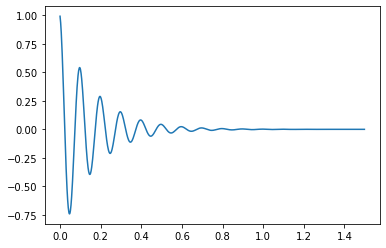

In [43]:
T = 1.5
N = 1000
omega = 10*2*np.pi
t = np.linspace(0, T, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(omega*t+np.random.rand())*np.exp(-0.1*omega*t)
plt.plot(t,x);

Impulzna prenosna funkcija pri Hilbertovi transformaciji:
$h(t)=\frac{1}{\pi\,t}$

In [44]:
th = dt*np.arange(len(x))
h = 1/(np.pi*th)
h[0] = h[1] # singularnost pri t=0! v frekvenčnem prostoru je ni

<ipython-input-44-2792be175bd9>:2: RuntimeWarning: divide by zero encountered in true_divide
  h = 1/(np.pi*th)


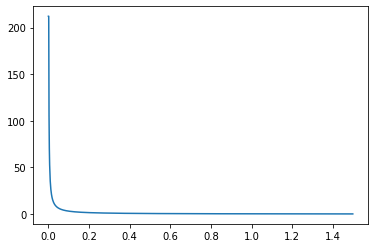

In [45]:
plt.plot(th, h);

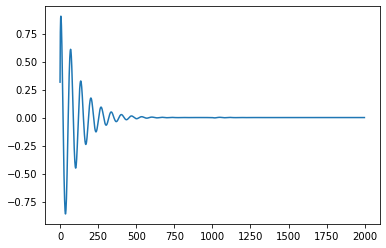

In [46]:
hx=np.convolve(h, x)*dt #pazi dt, dolžina: vsota obeh dolžin
plt.plot(hx);

In [47]:
hx = hx[:len(t)]#odrežemo dolžino po času, ki nas zanima

Analitični signal

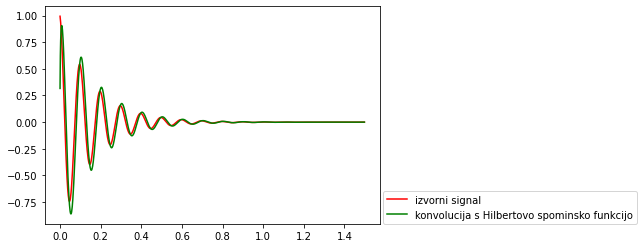

In [48]:
plt.plot(t,x,'r', label='izvorni signal');
plt.plot(t,hx,'g', label='konvolucija s Hilbertovo spominsko funkcijo');
plt.legend(loc=(1.01, 0));

In [49]:
a = x + 1j*hx

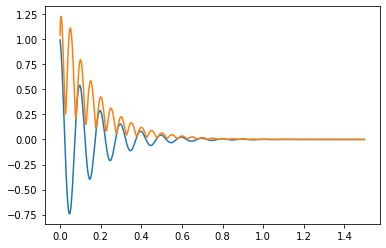

In [50]:
plt.plot(t,x);
plt.plot(t, np.abs(a));

In [51]:
H = np.fft.fft(h)#napaka zaradi singularnosti
H_teor = -1j*np.sign(f)#ni napake
f = np.fft.fftfreq(len(h), dt)
X2 = np.fft.fft(x)

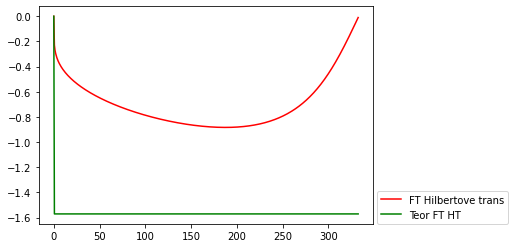

In [52]:
sel = f >= 0
plt.plot(f[sel], np.angle(H[sel]),'r', label='FT Hilbertove trans');
plt.plot(f[sel], np.angle(H_teor[sel]),'g', label='Teor FT HT');
plt.legend(loc=(1.01, 0));

c:\python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


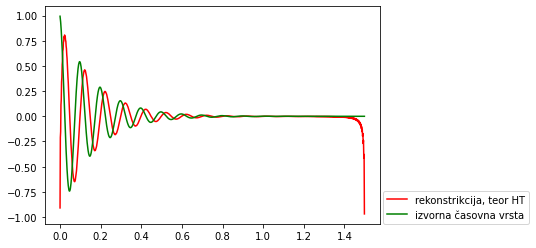

In [53]:
HX_teor = H_teor * X2
recons = np.fft.ifft(HX_teor)
plt.plot(t, recons, 'r', label='rekonstrikcija, teor HT')
plt.plot(t, x, 'g', label='izvorna časovna vrsta')
plt.legend(loc=(1.01, 0));

In [54]:
a=x+1j*recons

Prikaz ovojnice

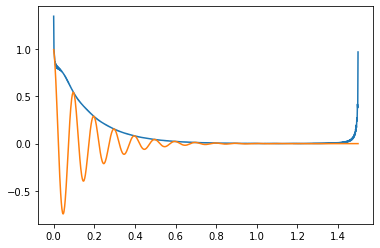

In [55]:
plt.plot(t, np.abs(a), label='ovojnica');
plt.plot(t, x);
#plt.plot(np.abs(recons));

### Odgovor

Zakaj se faze ne ujemajo?
Zato ker FFT čas začne pri času 0s, Diskretna oblika FT kakor je definirana zgoraj pa pri podanem času!